# Sentiment Analysis 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

In [94]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
df = data.copy()
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
z = df['review']
print(z)

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object


In [7]:
df['sentiment'].value_counts().sort_index()

sentiment
negative    25000
positive    25000
Name: count, dtype: int64

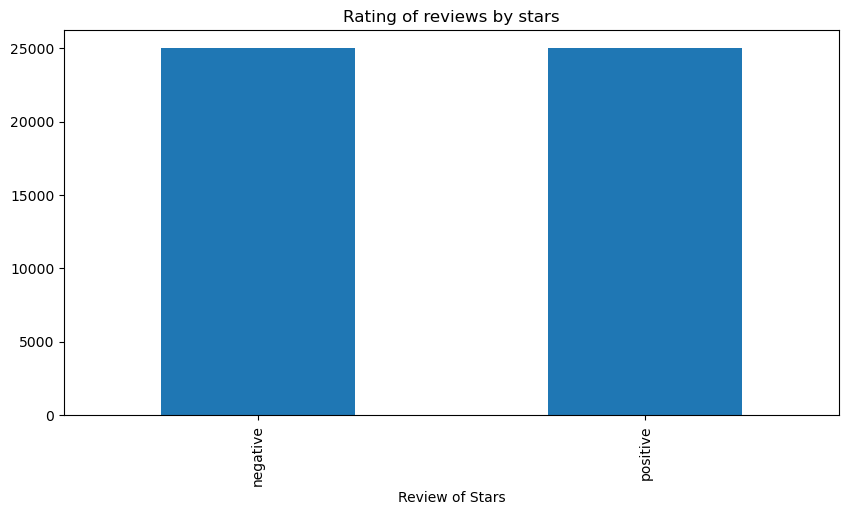

In [8]:
# to view the ratings counts
import matplotlib.pyplot as plt
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar',title='Rating of reviews by stars',figsize=(10,5))
ax.set_xlabel('Review of Stars')
plt.show()

# convert to int in sentiment

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [113]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [11]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [12]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

### split the train and test data

In [13]:
from sklearn.model_selection import train_test_split as tts
train_data, test_data = tts(df,test_size = 0.2,random_state = 42)

In [14]:
print('Training data = ',train_data.shape)
print('Testing data = ',test_data.shape)

Training data =  (40000, 2)
Testing data =  (10000, 2)


# data preprocessing

In [15]:
# ----------------tokenize the review
num_words = 5000 # for taking the most common 5000 words store like vocablary in the training data
tokenizer = Tokenizer(num_words) # used to convert the 5000 words to integers or into a form of a vectors
tokenizer.fit_on_texts(train_data['review']) 
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']),maxlen = 200)# to convert train data to equence of numbers and 
                                                                                     #input shape should be same max_len is of same lenght 200
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']),maxlen = 200) # to convert test data to equence of numbers

In [16]:
print(x_train)
print(x_train.shape)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]
(40000, 200)


In [17]:
print(x_test)
print(x_test.shape)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]
(10000, 200)


In [18]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']
print(y_train)
print("----------------------------------------------------------")
print(y_test)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64
----------------------------------------------------------
33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


# building the LSTM Model

In [20]:
# -------creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM

In [21]:
model = Sequential()
model.add(Embedding(input_dim = 5000,output_dim = 128,input_length = 200))
model.add(LSTM(128,dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(1,activation = "sigmoid"))

C:\Users\SJK\anaconda2\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
#----------------- modile compliation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [132]:
# -----------fit the model
model.fit(x_train,y_train,epochs = 5,batch_size = 64,validation_split = 0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 185s 355ms/step - accuracy: 0.7266 - loss: 0.5237 - val_accuracy: 0.8089 - val_loss: 0.4386
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 175s 350ms/step - accuracy: 0.7736 - loss: 0.4865 - val_accuracy: 0.8650 - val_loss: 0.3154
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 173s 346ms/step - accuracy: 0.8848 - loss: 0.2842 - val_accuracy: 0.8731 - val_loss: 0.2968
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 175s 350ms/step - accuracy: 0.9081 - loss: 0.2417 - val_accuracy: 0.8699 - val_loss: 0.3006
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 172s 345ms/step - accuracy: 0.9242 - loss: 0.2024 - val_accuracy: 0.8911 - val_loss: 0.2787


### model evaluation

In [139]:
loss,accuracy  = model.evaluate(x_test,y_test)
print(f"Accuracy score:{accuracy*100}")
print(f"loss value:{loss*100}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8912 - loss: 0.2700
Accuracy score:89.31000232696533
loss value:26.759448647499084


## Model Performance

In [134]:
# creating the sample function to check how the model prediction
def prediction_sentiment(reviewText):
    sequence = tokenizer.texts_to_sequences([reviewText]) # tokenization nd padding the reviews
    padded_sequence = pad_sequences(sequence,maxlen = 200)
    prediction = model.predict(padded_sequence)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

## checking with the other reviews

In [146]:
sample1 = "i hate movie.this movie is worst."
pred1  = prediction_sentiment(sample1)
print(sen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
negative


In [145]:
sample2 = """Hi, I'm Dhanalakshmi,  I completed a Python full stack course at softlogics academy KK Nagar. 
My technical trainer RK sir, I'm in debt to thank soft logics management for providing one of the good trainers, 
being a high school graduate I felt so much easier and more productive in learning coding and programming. 
He gave us knowledge about the practical world, gave examples in real life time, 
and explained the connection between aptitude and technical concepts. I loved the way RK sir's training provided daily tasks, 
regular technical tests, and aptitude tests, where I never felt I was not in touch or just easily forgot the things night itself that
I studied newly on the same morning. When we have clear doubts, we can feel free to ask them at any time. At the same time,
I must talk about my soft skills trainer Maria mam, She is the best mam I have ever seen. Mam helped me to overcome my stage fear, 
she gives daily spot tasks, to manage professionalism starting from top to toe all the things about the IT industry
(communication, manners, etiquette..) I came to know from her. Once again, Thank you Softlogics Academy,
it is one of the best training institutes for Learning new skills and building a strong foundation like a Pro I strongly recommend 
the SLA Institute."""
pred2  = prediction_sentiment(sample2)
print(pred2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
positive


In [147]:
sample3 = """I had an excellent time at SLA. I have completed a Python full-stack course at the SLA Institute in Navalur, Chennai. The training
was excellent, and they provided in-depth knowledge in a friendly environment. Aptitude tests and programming tests helped me improve my
skills and knowledge. Mock interviews helped me increase my confidence level.I want to say from the bottom of my heart that the placement 
team did an excellent job. Thanks to SLA for their support and guidance."""
pred3 =  prediction_sentiment(sample3)
print(pred3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
positive


In [148]:
sample4 = """Pls don't go data analytics course for this institute they will charge just python sql power bi 63,500  instead data mites 
institute you can go data science fees structure is 70000 only they will give free global certificate and free internship certificate 
in AI company pls don't go any course in this institute"""
pred4 =  prediction_sentiment(sample4)
print(pred4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
negative
